In [473]:
# Importamos la biblioteca pandas para leer nuestros datos
# con el alias 'pd'
import pandas as pd 

# Importamos la función train_test_split de sklearn.model_selection 
# para dividir nuestros datos en conjuntos de entrenamiento y prueba 
from sklearn.model_selection import train_test_split

# Importamos el StandardScaler para normalizar los datos.
from sklearn.preprocessing import StandardScaler

# Importamos el clasificador KNN de sklearn.neighbors 
# para la clasificación y la regresión
from sklearn.neighbors import KNeighborsClassifier

# Importamos las funciones classification_report y confusion_matrix 
# de sklearn.metrics para evaluar la precisión del modelo y 
# para visualizar los resultados de la clasificación
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

from matplotlib import pyplot as plt

path = "data/"

#importamos el archivo csv
data = pd.read_csv(path + "data_to_analize.csv", sep=',', encoding='utf-8', quotechar="'")

In [474]:
"""mapeo_estado_civil = {
    'C': 1,
    'S': 2,
    'V': 3,
}
data['EstadoCivil'] = data['EstadoCivil'].replace(mapeo_estado_civil)

mapeo_genero = {
    'M': 1,
    'F': 2,
}
data['Genero'] = data['Genero'].replace(mapeo_genero)

mapeo_educacion = {
    'Educación secundaria': 1,
    'Educación secundaria (en curso)': 2,
    'Estudios de postgrado': 3,
    'Estudios universitarios (en curso)': 4,
    'Licenciatura': 5,
}
data['Educacion'] = data['Educacion'].replace(mapeo_educacion)

mapeo_ocupacion = {
    'Administrativo': 1,
    'Gestión': 2,
    'Obrero': 3,
    'Obrero especializado': 4,
    'Profesional': 5,
}
data['Ocupacion'] = data['Ocupacion'].replace(mapeo_ocupacion)

mapeo_distancia = {
    '0-1 Km.': 1,
    '1-2 Km.': 2,
    '2-5 Km.': 3,
    '5-10 Km.': 4,
    '10+ Km.': 5,
}
data['Distancia'] = data['Distancia'].replace(mapeo_distancia)

mapeo_region = {
    'Norte': 1,
    'Sur': 2,
    'Centro': 3,
    'Noroeste': 4,
}
data['Region'] = data['Region'].replace(mapeo_region)"""

"mapeo_estado_civil = {\n    'C': 1,\n    'S': 2,\n    'V': 3,\n}\ndata['EstadoCivil'] = data['EstadoCivil'].replace(mapeo_estado_civil)\n\nmapeo_genero = {\n    'M': 1,\n    'F': 2,\n}\ndata['Genero'] = data['Genero'].replace(mapeo_genero)\n\nmapeo_educacion = {\n    'Educación secundaria': 1,\n    'Educación secundaria (en curso)': 2,\n    'Estudios de postgrado': 3,\n    'Estudios universitarios (en curso)': 4,\n    'Licenciatura': 5,\n}\ndata['Educacion'] = data['Educacion'].replace(mapeo_educacion)\n\nmapeo_ocupacion = {\n    'Administrativo': 1,\n    'Gestión': 2,\n    'Obrero': 3,\n    'Obrero especializado': 4,\n    'Profesional': 5,\n}\ndata['Ocupacion'] = data['Ocupacion'].replace(mapeo_ocupacion)\n\nmapeo_distancia = {\n    '0-1 Km.': 1,\n    '1-2 Km.': 2,\n    '2-5 Km.': 3,\n    '5-10 Km.': 4,\n    '10+ Km.': 5,\n}\ndata['Distancia'] = data['Distancia'].replace(mapeo_distancia)\n\nmapeo_region = {\n    'Norte': 1,\n    'Sur': 2,\n    'Centro': 3,\n    'Noroeste': 4,\n}\ndat

In [475]:
#list_x = data.columns.to_list()

list_x = ['Edad', 'IngresoAnual', 'TotalHijos', 'CantAutomoviles']
scaler = StandardScaler()
scaler.fit(data[list_x])

X= scaler.transform(data[list_x])
y = data.ComproBicicleta

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify = y)

Entrenamos el modelo KNN mediante la clase KNeighborsClassifier. Usamos el parametro **weights** que ponderar los puntos por la inversa de su distancia. En este caso, los vecinos más cercanos de un punto de consulta tendrán una mayor influencia que los vecinos más alejados. 
Probamos valores de K entre 1 y 10 vecinos mas cercanos.

In [477]:
for k in range(1,15,1):
  knn = KNeighborsClassifier(k, weights= "distance")
  knn.fit(X_train, y_train)
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
  print("_______________________________________")
  print(f"K igual a {k}: ")
  print(f'Accuracy de K-NN train: {knn.score(X_train, y_train):.2f}')
  print(f"F1 de K-NN train: {f1_score(y_train,pred_train, average='macro'):.2f}")
  print(f'Accuracy de K-NN test: {knn.score(X_test, y_test):.2f}')
  print(f"F1 de K-NN test: {f1_score(y_test, pred_test,average='macro'):.2f}")

_______________________________________
K igual a 1: 
Accuracy de K-NN train: 0.76
F1 de K-NN train: 0.75
Accuracy de K-NN test: 0.69
F1 de K-NN test: 0.68
_______________________________________
K igual a 2: 
Accuracy de K-NN train: 0.77
F1 de K-NN train: 0.74
Accuracy de K-NN test: 0.71
F1 de K-NN test: 0.67
_______________________________________
K igual a 3: 
Accuracy de K-NN train: 0.80
F1 de K-NN train: 0.78
Accuracy de K-NN test: 0.71
F1 de K-NN test: 0.69
_______________________________________
K igual a 4: 
Accuracy de K-NN train: 0.80
F1 de K-NN train: 0.77
Accuracy de K-NN test: 0.72
F1 de K-NN test: 0.69
_______________________________________
K igual a 5: 
Accuracy de K-NN train: 0.81
F1 de K-NN train: 0.79
Accuracy de K-NN test: 0.72
F1 de K-NN test: 0.70
_______________________________________
K igual a 6: 
Accuracy de K-NN train: 0.81
F1 de K-NN train: 0.79
Accuracy de K-NN test: 0.72
F1 de K-NN test: 0.70
_______________________________________
K igual a 7: 
Accuracy d

Seleccionamos K igual a 9 que nos da los mejores resultados en test.

In [478]:
knn = KNeighborsClassifier(9, weights= "distance")
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [479]:
pred = knn.predict(X_test)

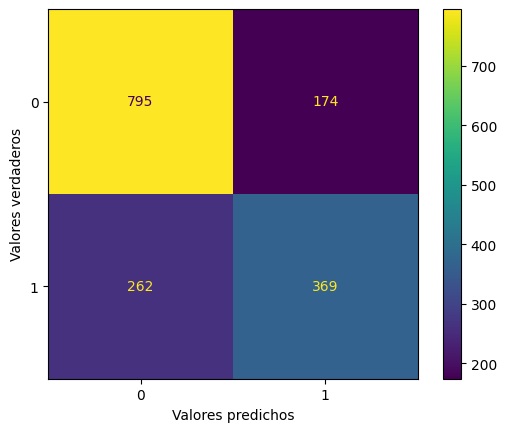

In [480]:
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
cm_display.plot()

plt.xlabel('Valores predichos')
plt.ylabel('Valores verdaderos')
plt.show()

Importamos el DataFrame con los datos de los destinatarios

In [481]:
#importamos el archivo csv
destinatarios = pd.read_csv(path + "destinatarios.csv", sep=',', encoding='utf-8', quotechar="'")

In [482]:
destinatarios_scaled = scaler.transform(destinatarios[list_x])

In [483]:
prediccion = knn.predict(destinatarios_scaled)[0]

In [484]:
destinatarios['ComproBicicleta'] = prediccion

In [485]:
X_train_original = scaler.inverse_transform(X_train)
X_train_original = pd.DataFrame(data= X_train_original,columns = list_x )
X_train_original["ComproBicicleta"] = y

In [486]:
X_train_original["Datos"] = "Original"
destinatarios["Datos"] = "Nueva"

data = pd.concat([X_train_original, destinatarios])

In [487]:
import seaborn as sns

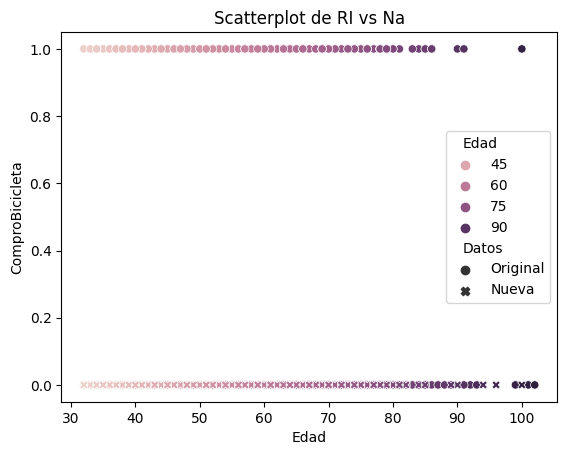

In [488]:
sns.scatterplot(data = data, x = "Edad", y = "ComproBicicleta", hue = "Edad", style = "Datos")
plt.title("Scatterplot de RI vs Na")
plt.show()